# K-Means Clustering and K-Nearest Neighbours

In this session we will try to get a high level intuition of how KNN method of classification works and what it is exactly.

## So what is K-Means Clustering anyways?
It's an unsupervised classfication based Machine Learning algorithm which means you just present the model with some data with no labels or tags
and expect it to do the labelling for you.
<img src="assets/unlabelled.png" width="800px"/>
<br />
And once it's done labelleling the dataset you can use this model for new data points to predict which class it comes under.

<img src="assets/clustering.png" width="800px"/>

#### As shown above a list of point that aren't classified in the beginning get classified by the K-means algorithm and make classes and relations that 
#### sometimes even humans can't see.

### Let's jump right in and make a rudimentary K-means classifier on 1 dimensional data.

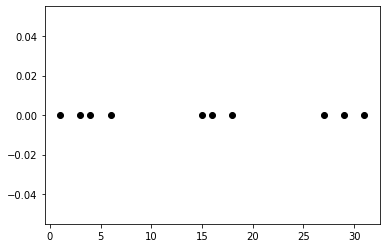

In [7]:
# Let's start with making a small data set 
import numpy as np
import matplotlib.pyplot as plt

data = np.array([1,3,4,6,15,16,18,27,29,31])
data_y = np.zeros(len(data))
plt.plot(data,data_y,'ko')
plt.show()

In [25]:
# Now we come to the clustering portion- selecting the k value is usually done by experimentation and variance bias calculations
# Since we can clearly see that there are 3 distinct classes let's take k to be equal to 3

# Let's select 3 random points
import random
random_int = random.sample(range(0,10),3)
red,blue,green = data[[i for i in random_int]]
print(f'red :{red}, blue: {blue}, green: {green}')
# we'll call the first index as red, second as blue and third green

red :4, blue: 29, green: 31


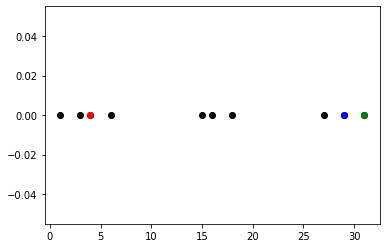

In [28]:
plt.plot(data,data_y,'ko')
plt.plot(red,0,'ro')
plt.plot(blue,0,'bo')
plt.plot(green,0,'go')

plt.show()

In [44]:
# Now we run over the entire list of data points to see which points are closest to which colour

def classify(data,red,blue,green,epoch):
    for rep in range(epoch):
        red_points = []
        green_points = []
        blue_points = []
        for i in data:
            
            if(abs(i-red)<abs(i-blue)) and (abs(i-red)<abs(i-green)):
                red_points.append(i)
            elif(abs(i-blue)<abs(i-red)) and (abs(i-blue)<abs(i-green)):
                blue_points.append(i)
            else:
                green_points.append(i)
            if len(red_points):
                red = sum(red_points)/len(red_points)
            if len(blue_points):
                blue = sum(blue_points)/len(blue_points)
            if len(green_points):
                green = sum(green_points)/len(green_points)
    return red_points,blue_points,green_points

def display(data,colour):
    data_y = np.zeros(len(data))
    if(colour == 'red'):
        plt.plot(data,data_y,'ro')
    elif(colour == 'green'):
        plt.plot(data,data_y,'go')
    else:
        plt.plot(data,data_y,'bo')
    


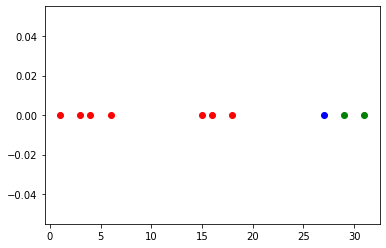

In [49]:
# On Iterating once we get this
red_points,blue_points,green_points = classify(data,red,blue,green,1)
display(red_points,'red')
display(blue_points,'blue')
display(green_points,'green')
plt.show()

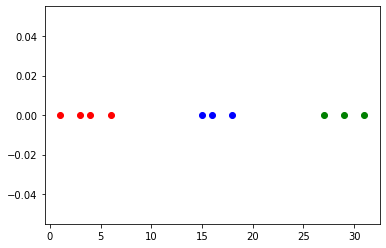

In [50]:
# Upon iterating several times we get the following markings
red_points,blue_points,green_points = classify(data,red,blue,green,5)
display(red_points,'red')
display(blue_points,'blue')
display(green_points,'green')
plt.show()
# Which is pretty much the classes that we can see visually in the first diagram
# Pretty cool right

#### Now say we have to classify which class a new data point falls under we just need to find the class that is closest to it
#### Basically comparing the new data to red,blue and green points at the end of training


## Now we proceed to use this k means classifier on ${some data set}